#  ***==================== sentiment analysis project ====================***

# import libraries for project works

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  we have using a oop for EDA work in our project also check dataset details below list:


1.   shape
2.   info
3.   total null value sum



In [7]:
class Dataset:

  def __init__(self,path):
    self.path = pd.read_csv(path)

  def __str__(self):
    return f'load data sucessfully'

  def head(self):
    return self.path.head()

  def shape(self):
    return self.path.shape

  def info(self):
    return self.path.info()

  def missing_value(self):
    return self.path.isnull().sum()


# class 2 made check null value percentage every columns and overall null value in dataset

In [8]:
class Missing_value_percentage(Dataset):

  def check_percentage(self):
     c = super().shape()
     a = super().missing_value()
     index = a.index.tolist()
     value = a.values.tolist()

     empty_list = []

     for idx , i in enumerate(zip(index,value)):
        print("*"*50)
        print(f'column number : {idx}')
        print(f'name of column in dataset : {i[0]} ')
        percentage = (i[1]/c[0] * 100)
        print(f'percentage value of missing value : {percentage} %')
        empty_list.append(percentage)
        print("*"*50)

     table = pd.DataFrame({"column_name" : index , "null_value" : value , "percentage" : empty_list})
     return table


  def total_null_percentage(self):
    total_cell = self.path.size
    total_missing = self.path.isnull().sum().sum()
    percentage_value = (total_missing/total_cell) * 100
    return  print(f'total percentage value of missing value : {percentage_value : .2f} %')


# class 3  remove duplicates rows and final preprocess dataset  return

In [9]:
class Preprocessing(Dataset):

  def rename_columns(self , rename_dict):
     self.path.rename(columns=rename_dict, inplace=True)
     return self

  def date_preprocess(self,column_name):
      self.path[column_name] = pd.to_datetime(self.path[column_name])
      self.path["date1"] = self.path[column_name].dt.date
      self.path["year"] = self.path[column_name].dt.year
      self.path["month"] = self.path[column_name].dt.month_name()
      self.path["day"] = self.path[column_name].dt.day
      return self


  def drop_column(self,column_name):
    self.path.drop(column_name,axis=1 , inplace = True)
    return self

  def drop_null_value(self):
    self.path.dropna(inplace=True)
    return self


  def drop_duplicate(self):
    a = self.path.duplicated().sum()
    self.path.drop_duplicates(inplace=True)
    b = self.path.shape
    return self


  def final_dataframe(self):
    """ return final dataframe """
    return self.path


# ***dataset 1 data cleaning using class methods***

In [10]:

a = Dataset("/content/Copy of train_data.csv")
print(a)

load data sucessfully


In [11]:
a.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [12]:
a.shape()

(2011, 8)

In [13]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  2011 non-null   object
 1   Product Brand        2011 non-null   object
 2   categories           2010 non-null   object
 3   primaryCategories    2010 non-null   object
 4   reviews.date         2010 non-null   object
 5   reviews.text         2010 non-null   object
 6   reviews.title        2006 non-null   object
 7   sentiment            2010 non-null   object
dtypes: object(8)
memory usage: 125.8+ KB


In [14]:
a.missing_value()

,0
Name of the product,0
Product Brand,0
categories,1
primaryCategories,1
reviews.date,1
reviews.text,1
reviews.title,5
sentiment,1


In [15]:
a1 = Missing_value_percentage("/content/Copy of train_data.csv")
print(a1)

load data sucessfully


In [16]:
a1.check_percentage()

**************************************************
column number : 0
name of column in dataset : Name of the product 
percentage value of missing value : 0.0 %
**************************************************
**************************************************
column number : 1
name of column in dataset : Product Brand 
percentage value of missing value : 0.0 %
**************************************************
**************************************************
column number : 2
name of column in dataset : categories 
percentage value of missing value : 0.04972650422675286 %
**************************************************
**************************************************
column number : 3
name of column in dataset : primaryCategories 
percentage value of missing value : 0.04972650422675286 %
**************************************************
**************************************************
column number : 4
name of column in dataset : reviews.date 
percentage value of missing va

,column_name,null_value,percentage
0,Name of the product,0,0.000000
1,Product Brand,0,0.000000
2,categories,1,0.049727
3,primaryCategories,1,0.049727
4,reviews.date,1,0.049727
5,reviews.text,1,0.049727
6,reviews.title,5,0.248633
7,sentiment,1,0.049727


In [17]:
a1.total_null_percentage()

total percentage value of missing value :  0.06 %


In [18]:
a2 = Preprocessing("/content/Copy of train_data.csv")
print(a2)

load data sucessfully


In [19]:
rename = {"Name of the product" : "product_name",
          "reviews.text" : "text",
          "reviews.title" : "title"}

final_dataframe1 = (a2.rename_columns(rename)
                   .date_preprocess("reviews.date")
                   .drop_column(["reviews.date","date1"])
                   .drop_null_value()
                   .drop_duplicate()
                   .final_dataframe())
final_dataframe1



,product_name,Product Brand,categories,primaryCategories,text,title,sentiment,year,month,day
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,2016.0,December,26.0
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,2018.0,January,17.0
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",Just an average Alexa option. Does show a few ...,Average,Neutral,2017.0,December,20.0
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics","very good product. Exactly what I wanted, and ...",Greattttttt,Positive,2017.0,August,4.0
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,2017.0,January,23.0
...,...,...,...,...,...,...,...,...,...,...
2005,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,The only problem I have is have to recharge ba...,short battery life,Positive,2017.0,February,14.0
2006,"Fire HD 8 Tablet with Alexa, 8"" HD Display, 32...",Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",Electronics,"easy to use. nice sides and easy to read ,, al...",love it,Positive,2017.0,February,13.0
2007,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,I use it to stream movies while on the tread m...,Great to stream movies,Positive,2017.0,May,18.0
2008,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,"Computers,Fire Tablets,Electronics Features,Co...",Electronics,This is great if you have two kids and want to...,Best Kindle for my needs*,Positive,2017.0,June,2.0


## ***dataset 2 data cleaning using class  methods***

In [20]:
b = Dataset("/content/Copy of test_data_hidden.csv")
print(b)

load data sucessfully


In [21]:
b.head()


,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device,Positive
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!,Positive


In [22]:
b.shape()

(1000, 8)

In [23]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  1000 non-null   object
 1   Product Brand        1000 non-null   object
 2   categories           1000 non-null   object
 3   primaryCategories    1000 non-null   object
 4   reviews.date         1000 non-null   object
 5   reviews.text         1000 non-null   object
 6   reviews.title        997 non-null    object
 7   sentiment            1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [24]:
b1 = Missing_value_percentage("/content/Copy of test_data_hidden.csv")
print(b1)

load data sucessfully


In [25]:
b1.check_percentage()

**************************************************
column number : 0
name of column in dataset : Name of the product 
percentage value of missing value : 0.0 %
**************************************************
**************************************************
column number : 1
name of column in dataset : Product Brand 
percentage value of missing value : 0.0 %
**************************************************
**************************************************
column number : 2
name of column in dataset : categories 
percentage value of missing value : 0.0 %
**************************************************
**************************************************
column number : 3
name of column in dataset : primaryCategories 
percentage value of missing value : 0.0 %
**************************************************
**************************************************
column number : 4
name of column in dataset : reviews.date 
percentage value of missing value : 0.0 %
********************

,column_name,null_value,percentage
0,Name of the product,0,0.0
1,Product Brand,0,0.0
2,categories,0,0.0
3,primaryCategories,0,0.0
4,reviews.date,0,0.0
5,reviews.text,0,0.0
6,reviews.title,3,0.3
7,sentiment,0,0.0


In [26]:
b1.total_null_percentage()

total percentage value of missing value :  0.04 %


In [27]:
b2 = Preprocessing("/content/Copy of test_data_hidden.csv")
print(b2)

load data sucessfully


In [28]:
rename = {"Name of the product" : "product_name",
          "reviews.text" : "text",
          "reviews.title" : "title"}

final_dataframe2 = (b2.rename_columns(rename)
                   .date_preprocess("reviews.date")
                   .drop_column(["reviews.date","date1"])
                   .drop_null_value()
                   .drop_duplicate()
                   .final_dataframe())
final_dataframe2


,product_name,Product Brand,categories,primaryCategories,text,title,sentiment,year,month,day
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,Amazon kindle fire has a lot of free app and c...,very handy device,Positive,2016,May,23
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",The Echo Show is a great addition to the Amazo...,Another winner from Amazon,Positive,2018,January,2
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,Positive,2017,January,2
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,"I use mine for email, Facebook ,games and to g...",Love it!!!,Positive,2017,March,25
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",This is a fantastic item & the person I bought...,Fantastic!,Positive,2017,November,15
...,...,...,...,...,...,...,...,...,...,...
995,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",We love Alexa! Love being able to watch news b...,Awesome,Positive,2017,December,7
996,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,Speaker is pretty loud and I love that I can t...,Good Bluetooth device,Neutral,2017,January,23
997,"Fire HD 8 Tablet with Alexa, 8"" HD Display, 32...",Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",Electronics,Bought 2 of these for my 6 and 8 yr old and it...,good product for kids,Positive,2017,January,18
998,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Was told by sales person I could come back in ...,Was misled on price match. Item is okay.,Positive,2016,December,12


## ***dataset 3 data cleaning  using class  methods***

In [29]:
c = Dataset("/content/Copy of test_data.csv")
print(c)

load data sucessfully


In [30]:
c.head()


,Name of the product,Product Brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


In [31]:
c.shape()

(1000, 7)

In [32]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  1000 non-null   object
 1   Product Brand        1000 non-null   object
 2   categories           1000 non-null   object
 3   primaryCategories    1000 non-null   object
 4   reviews.date         1000 non-null   object
 5   reviews.text         1000 non-null   object
 6   reviews.title        997 non-null    object
dtypes: object(7)
memory usage: 54.8+ KB


In [33]:
c.missing_value()

,0
Name of the product,0
Product Brand,0
categories,0
primaryCategories,0
reviews.date,0
reviews.text,0
reviews.title,3


In [34]:
c1 = Missing_value_percentage("/content/Copy of test_data.csv")
print(c1)

load data sucessfully


In [35]:
c1.check_percentage()

**************************************************
column number : 0
name of column in dataset : Name of the product 
percentage value of missing value : 0.0 %
**************************************************
**************************************************
column number : 1
name of column in dataset : Product Brand 
percentage value of missing value : 0.0 %
**************************************************
**************************************************
column number : 2
name of column in dataset : categories 
percentage value of missing value : 0.0 %
**************************************************
**************************************************
column number : 3
name of column in dataset : primaryCategories 
percentage value of missing value : 0.0 %
**************************************************
**************************************************
column number : 4
name of column in dataset : reviews.date 
percentage value of missing value : 0.0 %
********************

,column_name,null_value,percentage
0,Name of the product,0,0.0
1,Product Brand,0,0.0
2,categories,0,0.0
3,primaryCategories,0,0.0
4,reviews.date,0,0.0
5,reviews.text,0,0.0
6,reviews.title,3,0.3


In [36]:
c1.total_null_percentage()

total percentage value of missing value :  0.04 %


In [37]:
c2 = Preprocessing("/content/Copy of test_data.csv")
print(c2)

load data sucessfully


In [38]:
rename = {"Name of the product" : "product_name",
          "reviews.text" : "text",
          "reviews.title" : "title"}

final_dataframe3 = (c2.rename_columns(rename)
                   .date_preprocess("reviews.date")
                   .drop_column(["reviews.date","date1"])
                   .drop_null_value()
                   .drop_duplicate()
                   .final_dataframe())
final_dataframe3


,product_name,Product Brand,categories,primaryCategories,text,title,year,month,day
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,Amazon kindle fire has a lot of free app and c...,very handy device,2016,May,23
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",The Echo Show is a great addition to the Amazo...,Another winner from Amazon,2018,January,2
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,2017,January,2
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,"I use mine for email, Facebook ,games and to g...",Love it!!!,2017,March,25
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",This is a fantastic item & the person I bought...,Fantastic!,2017,November,15
...,...,...,...,...,...,...,...,...,...
995,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",We love Alexa! Love being able to watch news b...,Awesome,2017,December,7
996,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,Speaker is pretty loud and I love that I can t...,Good Bluetooth device,2017,January,23
997,"Fire HD 8 Tablet with Alexa, 8"" HD Display, 32...",Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",Electronics,Bought 2 of these for my 6 and 8 yr old and it...,good product for kids,2017,January,18
998,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Was told by sales person I could come back in ...,Was misled on price match. Item is okay.,2016,December,12


# ***final traianing dataset after cleaning a dataset***

In [39]:
final_train_dataset = pd.concat([final_dataframe1,final_dataframe2] , ignore_index=True)
final_train_dataset

,product_name,Product Brand,categories,primaryCategories,text,title,sentiment,year,month,day
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,2016.0,December,26.0
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,2018.0,January,17.0
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",Just an average Alexa option. Does show a few ...,Average,Neutral,2017.0,December,20.0
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics","very good product. Exactly what I wanted, and ...",Greattttttt,Positive,2017.0,August,4.0
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,2017.0,January,23.0
...,...,...,...,...,...,...,...,...,...,...
2980,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",We love Alexa! Love being able to watch news b...,Awesome,Positive,2017.0,December,7.0
2981,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,Speaker is pretty loud and I love that I can t...,Good Bluetooth device,Neutral,2017.0,January,23.0
2982,"Fire HD 8 Tablet with Alexa, 8"" HD Display, 32...",Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",Electronics,Bought 2 of these for my 6 and 8 yr old and it...,good product for kids,Positive,2017.0,January,18.0
2983,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Was told by sales person I could come back in ...,Was misled on price match. Item is okay.,Positive,2016.0,December,12.0


In [40]:
final_train_dataset.duplicated().sum()


np.int64(15)

In [41]:
final_train_dataset.drop_duplicates(inplace=True , ignore_index=True)
final_train_dataset

,product_name,Product Brand,categories,primaryCategories,text,title,sentiment,year,month,day
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,2016.0,December,26.0
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,2018.0,January,17.0
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",Just an average Alexa option. Does show a few ...,Average,Neutral,2017.0,December,20.0
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics","very good product. Exactly what I wanted, and ...",Greattttttt,Positive,2017.0,August,4.0
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,2017.0,January,23.0
...,...,...,...,...,...,...,...,...,...,...
2965,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",We love Alexa! Love being able to watch news b...,Awesome,Positive,2017.0,December,7.0
2966,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,Speaker is pretty loud and I love that I can t...,Good Bluetooth device,Neutral,2017.0,January,23.0
2967,"Fire HD 8 Tablet with Alexa, 8"" HD Display, 32...",Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",Electronics,Bought 2 of these for my 6 and 8 yr old and it...,good product for kids,Positive,2017.0,January,18.0
2968,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Was told by sales person I could come back in ...,Was misled on price match. Item is okay.,Positive,2016.0,December,12.0


In [42]:
final_train_dataset.shape

(2970, 10)

In [43]:
final_train_dataset

,product_name,Product Brand,categories,primaryCategories,text,title,sentiment,year,month,day
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,2016.0,December,26.0
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,2018.0,January,17.0
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",Just an average Alexa option. Does show a few ...,Average,Neutral,2017.0,December,20.0
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics","very good product. Exactly what I wanted, and ...",Greattttttt,Positive,2017.0,August,4.0
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,2017.0,January,23.0
...,...,...,...,...,...,...,...,...,...,...
2965,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",We love Alexa! Love being able to watch news b...,Awesome,Positive,2017.0,December,7.0
2966,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,Speaker is pretty loud and I love that I can t...,Good Bluetooth device,Neutral,2017.0,January,23.0
2967,"Fire HD 8 Tablet with Alexa, 8"" HD Display, 32...",Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",Electronics,Bought 2 of these for my 6 and 8 yr old and it...,good product for kids,Positive,2017.0,January,18.0
2968,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Was told by sales person I could come back in ...,Was misled on price match. Item is okay.,Positive,2016.0,December,12.0


In [44]:
final_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2970 entries, 0 to 2969
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_name       2970 non-null   object 
 1   Product Brand      2970 non-null   object 
 2   categories         2970 non-null   object 
 3   primaryCategories  2970 non-null   object 
 4   text               2970 non-null   object 
 5   title              2970 non-null   object 
 6   sentiment          2970 non-null   object 
 7   year               2970 non-null   float64
 8   month              2970 non-null   object 
 9   day                2970 non-null   float64
dtypes: float64(2), object(8)
memory usage: 232.2+ KB


<Axes: >

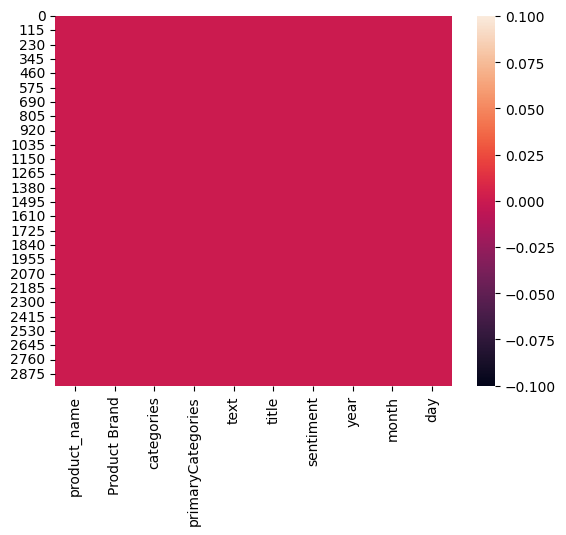

In [45]:
sns.heatmap(final_train_dataset.isnull())

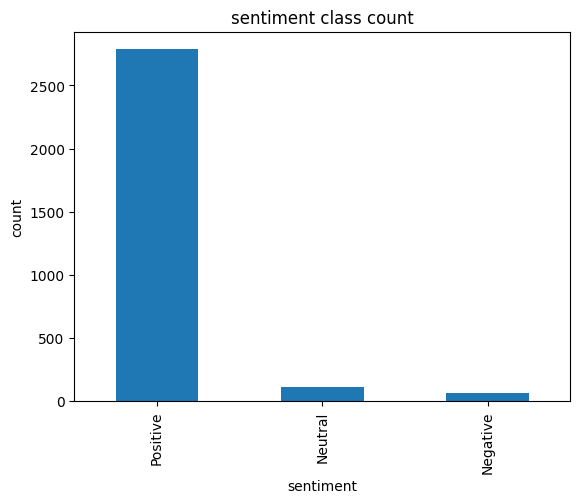

In [46]:
final_train_dataset["sentiment"].value_counts().plot(kind="bar")
plt.title("sentiment class count")
plt.xlabel("sentiment")
plt.ylabel("count")
plt.show()


In [47]:
# character check in review text

final_train_dataset["char_len"] = final_train_dataset["text"].str.len()
final_train_dataset["char_len"].sort_values(ascending=False)

,char_len
2827,8351
1010,8351
2764,3697
306,3668
2935,2364
...,...
2943,50
1256,49
603,48
2552,48


In [48]:
# check how many word coming in review column

final_train_dataset["word_count"] = final_train_dataset["text"].str.split().apply(len)
final_train_dataset["word_count"].sort_values(ascending=False)

,word_count
2827,1539
1010,1539
306,709
2764,669
2935,476
...,...
499,6
1665,5
2305,4
177,3


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

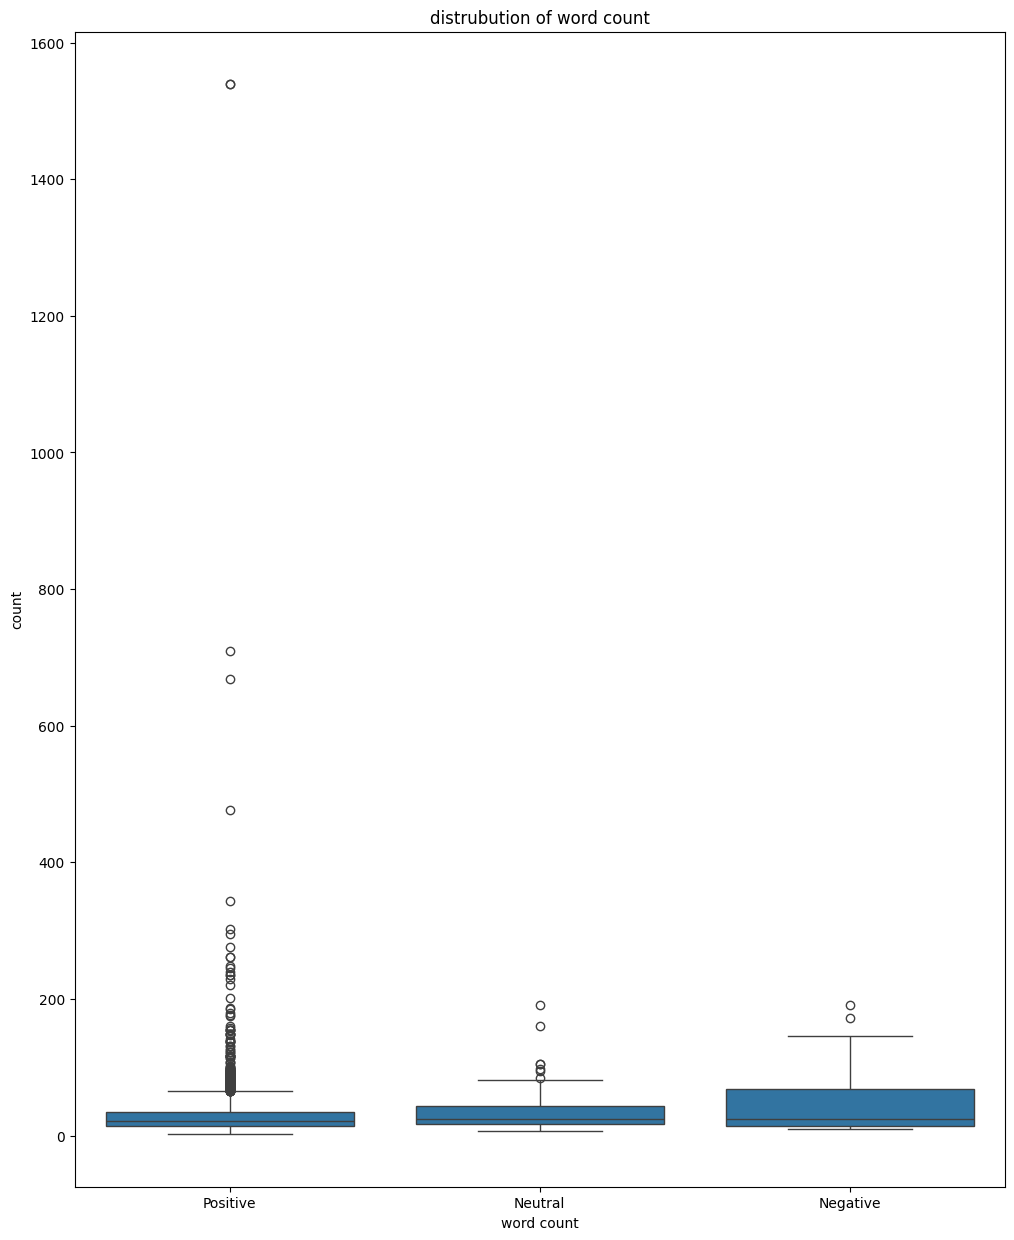

In [50]:
# boxplot graph

plt.figure(figsize = (12 , 15))
sns.boxplot(data = final_train_dataset , y = "word_count" , x = "sentiment" )
plt.title("distrubution of word count")
plt.xlabel("word count")
plt.ylabel("count")
plt.show()

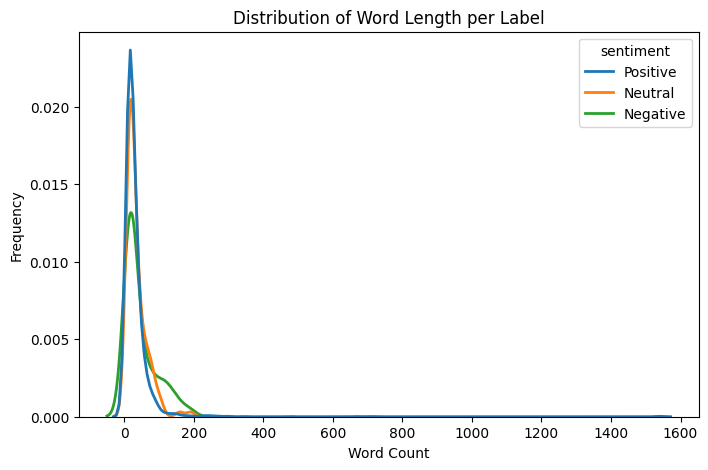

In [51]:
# kde plot check distribution of sentiment

plt.figure(figsize=(8, 5))
sns.kdeplot(data=final_train_dataset , x='word_count', hue='sentiment' , fill=False, common_norm=False, linewidth=2)
plt.title('Distribution of Word Length per Label')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


In [52]:
state = final_train_dataset.groupby("sentiment")[["char_len" , "word_count"]].describe()
state

char_len                                                      \
             count        mean         std   min    25%    50%     75%   
sentiment                                                                
Negative      68.0  240.308824  232.740343  50.0  81.75  132.5  355.25   
Neutral      116.0  183.681034  154.048643  51.0  85.75  126.5  234.50   
Positive    2786.0  160.800072  283.291575  45.0  70.00  104.5  178.00   

                  word_count                                                 \
              max      count       mean        std  min    25%   50%    75%   
sentiment                                                                     
Negative    978.0       68.0  45.808824  45.182633  9.0  14.00  24.5  67.50   
Neutral     982.0      116.0  35.353448  29.876341  7.0  16.75  24.5  43.00   
Positive   8351.0     2786.0  30.829864  52.831229  2.0  14.00  21.0  34.75   

                   
              max  
sentiment          
Negative    191.0  
Neutral     191.0  
Positive   1539.0

In [53]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 12.2 MB/s eta 0:00:00


In [54]:
import contractions
import re

In [55]:
def text_preprocess(text):
  text = contractions.fix(text)
  text = text.lower()
  text = re.sub(r'<.*?>', '', text)               # remove html tags
  text = re.sub(r'http\S+|www\.\S+', '', text)    # remove urls
  text = re.sub(r'\d+',"",text)                   # remove numbers
  text = re.sub(r'[^\w\s]',"",text).strip()
  return text

In [56]:
final_train_dataset["new_text"] = final_train_dataset["text"].apply(text_preprocess)
final_train_dataset['new_text']

,new_text
0,purchased on black fridaypros great price eve...
1,i purchased two amazon in echo plus and two do...
2,just an average alexa option does show a few t...
3,very good product exactly what i wanted and a ...
4,this is the rd one i have purchased i have bou...
...,...
2965,we love alexa love being able to watch news br...
2966,speaker is pretty loud and i love that i can t...
2967,bought of these for my and yr old and it sa...
2968,was told by sales person i could come back in ...


In [57]:
final_train_dataset

,product_name,Product Brand,categories,primaryCategories,text,title,sentiment,year,month,day,char_len,word_count,new_text
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,2016.0,December,26.0,409,72,purchased on black fridaypros great price eve...
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,2018.0,January,17.0,593,113,i purchased two amazon in echo plus and two do...
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",Just an average Alexa option. Does show a few ...,Average,Neutral,2017.0,December,20.0,81,15,just an average alexa option does show a few t...
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics","very good product. Exactly what I wanted, and ...",Greattttttt,Positive,2017.0,August,4.0,63,12,very good product exactly what i wanted and a ...
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,2017.0,January,23.0,179,35,this is the rd one i have purchased i have bou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",We love Alexa! Love being able to watch news b...,Awesome,Positive,2017.0,December,7.0,145,28,we love alexa love being able to watch news br...
2966,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,Speaker is pretty loud and I love that I can t...,Good Bluetooth device,Neutral,2017.0,January,23.0,130,28,speaker is pretty loud and i love that i can t...
2967,"Fire HD 8 Tablet with Alexa, 8"" HD Display, 32...",Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",Electronics,Bought 2 of these for my 6 and 8 yr old and it...,good product for kids,Positive,2017.0,January,18.0,447,84,bought of these for my and yr old and it sa...
2968,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Was told by sales person I could come back in ...,Was misled on price match. Item is okay.,Positive,2016.0,December,12.0,184,36,was told by sales person i could come back in ...


In [58]:
! pip install symspellpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.6/159.6 kB 16.2 MB/s eta 0:00:00


In [59]:
from symspellpy import SymSpell, Verbosity
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

def spell_check(text):

  a = text.split()
  corrected = []


  for i in a:
     result = sym_spell.lookup(i , Verbosity.CLOSEST)

     if result:
         corrected.append(result[0].term)
     else:
         corrected.append(i)
  return ' '.join(corrected)



In [60]:
final_train_dataset["new_text"] = final_train_dataset["new_text"].apply(spell_check)
final_train_dataset['new_text']

,new_text
0,purchased on black fridaypros great price even...
1,i purchased two amazon in echo plus and two do...
2,just an average alexa option does show a few t...
3,very good product exactly what i wanted and a ...
4,this is the rd one i have purchased i have bou...
...,...
2965,we love alexa love being able to watch news br...
2966,speaker is pretty loud and i love that i can t...
2967,bought of these for my and yr old and it said ...
2968,was told by sales person i could come back in ...


In [61]:
import spacy
nlp = spacy.load("en_core_web_sm")

class Process:
    def __init__(self, text):
        self.text = text
        self.doc  = nlp(text)
        self.tokens = [ ]
        self.stop_word = [ ]
        self.lemma = [ ]

    def tokenize(self):
        self.tokens = [token.text for token in self.doc]
        return self

    def remove_stop_word(self):
        self.stop_word = [token for token in self.doc if not token.is_stop]
        return self

    def lemmatization(self):
        self.lemma = [token.lemma_ for token in self.stop_word]
        return self

    def get_result(self):
        return {"lemma" : self.lemma}


In [62]:
def process(text):
  a = Process(text)
  result = (a.tokenize()
            .remove_stop_word()
            .lemmatization()
            .get_result())
  return ' '.join(result['lemma'])

In [63]:
final_train_dataset["lemma"] = final_train_dataset['new_text'].apply(process)
final_train_dataset

,product_name,Product Brand,categories,primaryCategories,text,title,sentiment,year,month,day,char_len,word_count,new_text,lemma
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,2016.0,December,26.0,409,72,purchased on black fridaypros great price even...,purchase black fridaypro great price salevery ...
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,2018.0,January,17.0,593,113,i purchased two amazon in echo plus and two do...,purchase amazon echo plus dot plus fire stick ...
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",Just an average Alexa option. Does show a few ...,Average,Neutral,2017.0,December,20.0,81,15,just an average alexa option does show a few t...,average alexa option thing screen limit
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics","very good product. Exactly what I wanted, and ...",Greattttttt,Positive,2017.0,August,4.0,63,12,very good product exactly what i wanted and a ...,good product exactly want good price
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,2017.0,January,23.0,179,35,this is the rd one i have purchased i have bou...,rd purchase buy niece case compare hold protec...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",We love Alexa! Love being able to watch news b...,Awesome,Positive,2017.0,December,7.0,145,28,we love alexa love being able to watch news br...,love alexa love able watch news briefing see l...
2966,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,Speaker is pretty loud and I love that I can t...,Good Bluetooth device,Neutral,2017.0,January,23.0,130,28,speaker is pretty loud and i love that i can t...,speaker pretty loud love downside hold home bu...
2967,"Fire HD 8 Tablet with Alexa, 8"" HD Display, 32...",Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",Electronics,Bought 2 of these for my 6 and 8 yr old and it...,good product for kids,Positive,2017.0,January,18.0,447,84,bought of these for my and yr old and it said ...,buy yr old say come gb storage actual storage ...
2968,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Was told by sales person I could come back in ...,Was misled on price match. Item is okay.,Positive,2016.0,December,12.0,184,36,was told by sales person i could come back in ...,tell sale person come week receipt black frida...


# ***perform all steps in test data in applied in training data***

first perform is convert into lower case , remove html tags , urls , emojis and numbers using fuction

In [64]:
final_dataframe3

,product_name,Product Brand,categories,primaryCategories,text,title,year,month,day
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,Amazon kindle fire has a lot of free app and c...,very handy device,2016,May,23
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",The Echo Show is a great addition to the Amazo...,Another winner from Amazon,2018,January,2
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,2017,January,2
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,"I use mine for email, Facebook ,games and to g...",Love it!!!,2017,March,25
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",This is a fantastic item & the person I bought...,Fantastic!,2017,November,15
...,...,...,...,...,...,...,...,...,...
995,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",We love Alexa! Love being able to watch news b...,Awesome,2017,December,7
996,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,Speaker is pretty loud and I love that I can t...,Good Bluetooth device,2017,January,23
997,"Fire HD 8 Tablet with Alexa, 8"" HD Display, 32...",Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",Electronics,Bought 2 of these for my 6 and 8 yr old and it...,good product for kids,2017,January,18
998,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Was told by sales person I could come back in ...,Was misled on price match. Item is okay.,2016,December,12


In [65]:
final_dataframe3

,product_name,Product Brand,categories,primaryCategories,text,title,year,month,day
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,Amazon kindle fire has a lot of free app and c...,very handy device,2016,May,23
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",The Echo Show is a great addition to the Amazo...,Another winner from Amazon,2018,January,2
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,2017,January,2
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,"I use mine for email, Facebook ,games and to g...",Love it!!!,2017,March,25
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",This is a fantastic item & the person I bought...,Fantastic!,2017,November,15
...,...,...,...,...,...,...,...,...,...
995,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",We love Alexa! Love being able to watch news b...,Awesome,2017,December,7
996,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,Speaker is pretty loud and I love that I can t...,Good Bluetooth device,2017,January,23
997,"Fire HD 8 Tablet with Alexa, 8"" HD Display, 32...",Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",Electronics,Bought 2 of these for my 6 and 8 yr old and it...,good product for kids,2017,January,18
998,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Was told by sales person I could come back in ...,Was misled on price match. Item is okay.,2016,December,12


In [66]:
final_dataframe3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   product_name       994 non-null    object
 1   Product Brand      994 non-null    object
 2   categories         994 non-null    object
 3   primaryCategories  994 non-null    object
 4   text               994 non-null    object
 5   title              994 non-null    object
 6   year               994 non-null    int32 
 7   month              994 non-null    object
 8   day                994 non-null    int32 
dtypes: int32(2), object(7)
memory usage: 69.9+ KB


<Axes: >

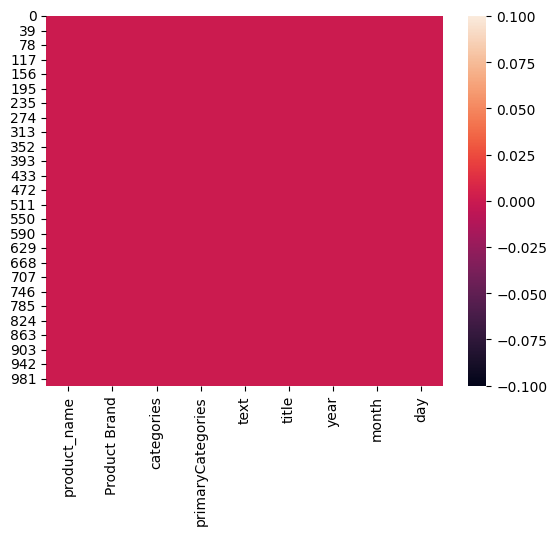

In [67]:
sns.heatmap(final_dataframe3.isnull())

In [68]:
final_dataframe3["char_len"] = final_dataframe3["text"].str.len()
final_dataframe3["char_len"].sort_values(ascending=False)

,char_len
852,8351
789,3697
963,2364
704,1619
398,1575
...,...
97,50
608,50
558,50
289,50


In [69]:
final_dataframe3["word_count"] = final_dataframe3["text"].str.split().apply(len)
final_dataframe3["word_count"].sort_values(ascending=False)

,word_count
852,1539
789,669
963,476
704,302
398,295
...,...
490,8
240,8
201,8
397,7


In [70]:
final_dataframe3.describe()

,year,day,char_len,word_count
count,994.000000,994.000000,994.000000,994.000000
mean,2016.840040,15.744467,169.234406,32.510060
std,0.660774,8.598642,328.435831,60.887481
min,2014.000000,1.000000,48.000000,4.000000
25%,2016.000000,8.000000,71.000000,14.000000
50%,2017.000000,16.000000,106.000000,21.000000
75%,2017.000000,23.000000,182.000000,35.000000
max,2018.000000,31.000000,8351.000000,1539.000000


In [71]:
def text_preprocess(text):
  text = contractions.fix(text)
  text = text.lower()
  text = re.sub(r'<.*?>', '', text)               # remove html tags
  text = re.sub(r'http\S+|www\.\S+', '', text)    # remove urls
  text = re.sub(r'\d+',"",text)                   # remove numbers
  text = re.sub(r'[^\w\s]',"",text).strip()
  return text

In [72]:
final_dataframe3["new_text"] = final_dataframe3["text"].apply(text_preprocess)
final_dataframe3['new_text']

,new_text
0,amazon kindle fire has a lot of free app and c...
1,the echo show is a great addition to the amazo...
2,great value from best buy bought at christmas ...
3,i use mine for email facebook games and to go ...
4,this is a fantastic item the person i bought ...
...,...
995,we love alexa love being able to watch news br...
996,speaker is pretty loud and i love that i can t...
997,bought of these for my and yr old and it sa...
998,was told by sales person i could come back in ...


In [73]:
from symspellpy import SymSpell, Verbosity
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

def spell_check(text):

  a = text.split()
  corrected = []


  for i in a:
     result = sym_spell.lookup(i , Verbosity.CLOSEST)

     if result:
         corrected.append(result[0].term)
     else:
         corrected.append(i)
  return ' '.join(corrected)


In [74]:
final_dataframe3['new_text'] = final_dataframe3['new_text'].apply(spell_check)
final_dataframe3

,product_name,Product Brand,categories,primaryCategories,text,title,year,month,day,char_len,word_count,new_text
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,Amazon kindle fire has a lot of free app and c...,very handy device,2016,May,23,101,22,amazon kindle fire has a lot of free app and c...
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",The Echo Show is a great addition to the Amazo...,Another winner from Amazon,2018,January,2,312,54,the echo show is a great addition to the amazo...
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,2017,January,2,52,9,great value from best buy bought at christmas ...
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,"I use mine for email, Facebook ,games and to g...",Love it!!!,2017,March,25,178,38,i use mine for email facebook games and to go ...
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",This is a fantastic item & the person I bought...,Fantastic!,2017,November,15,63,14,this is a fantastic item the person i bought i...
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",We love Alexa! Love being able to watch news b...,Awesome,2017,December,7,145,28,we love alexa love being able to watch news br...
996,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,Speaker is pretty loud and I love that I can t...,Good Bluetooth device,2017,January,23,130,28,speaker is pretty loud and i love that i can t...
997,"Fire HD 8 Tablet with Alexa, 8"" HD Display, 32...",Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",Electronics,Bought 2 of these for my 6 and 8 yr old and it...,good product for kids,2017,January,18,447,84,bought of these for my and yr old and it said ...
998,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Was told by sales person I could come back in ...,Was misled on price match. Item is okay.,2016,December,12,184,36,was told by sales person i could come back in ...


In [75]:
import spacy
nlp = spacy.load("en_core_web_sm")

class Process:
    def __init__(self, text):
        self.text = text
        self.doc  = nlp(text)
        self.tokens = [ ]
        self.stop_word = [ ]
        self.lemma = [ ]

    def tokenize(self):
        self.tokens = [token.text for token in self.doc]
        return self

    def remove_stop_word(self):
        self.stop_word = [token for token in self.doc if not token.is_stop]
        return self

    def lemmatization(self):
        self.lemma = [token.lemma_ for token in self.stop_word]
        return self

    def get_result(self):
        return {"lemma" : self.lemma}


In [76]:
def process(text):
  a = Process(text)
  result = (a.tokenize()
            .remove_stop_word()
            .lemmatization()
            .get_result())
  return ' '.join(result['lemma'])

In [77]:
final_dataframe3["lemma"] = final_dataframe3['new_text'].apply(process)
final_dataframe3

,product_name,Product Brand,categories,primaryCategories,text,title,year,month,day,char_len,word_count,new_text,lemma
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,Amazon kindle fire has a lot of free app and c...,very handy device,2016,May,23,101,22,amazon kindle fire has a lot of free app and c...,amazon kindle fire lot free app want online
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",The Echo Show is a great addition to the Amazo...,Another winner from Amazon,2018,January,2,312,54,the echo show is a great addition to the amazo...,echo great addition amazon family work like ec...
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,2017,January,2,52,9,great value from best buy bought at christmas ...,great value good buy buy christmas sale
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,"I use mine for email, Facebook ,games and to g...",Love it!!!,2017,March,25,178,38,i use mine for email facebook games and to go ...,use email facebook game line load book use pho...
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",This is a fantastic item & the person I bought...,Fantastic!,2017,November,15,63,14,this is a fantastic item the person i bought i...,fantastic item person buy love
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",We love Alexa! Love being able to watch news b...,Awesome,2017,December,7,145,28,we love alexa love being able to watch news br...,love alexa love able watch news briefing see l...
996,Amazon Tap - Alexa-Enabled Portable Bluetooth ...,Amazon,"Amazon Echo,Home Theater & Audio,MP3 MP4 Playe...",Electronics,Speaker is pretty loud and I love that I can t...,Good Bluetooth device,2017,January,23,130,28,speaker is pretty loud and i love that i can t...,speaker pretty loud love downside hold home bu...
997,"Fire HD 8 Tablet with Alexa, 8"" HD Display, 32...",Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",Electronics,Bought 2 of these for my 6 and 8 yr old and it...,good product for kids,2017,January,18,447,84,bought of these for my and yr old and it said ...,buy yr old say come gb storage actual storage ...
998,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Was told by sales person I could come back in ...,Was misled on price match. Item is okay.,2016,December,12,184,36,was told by sales person i could come back in ...,tell sale person come week receipt black frida...


# ***handle imbalance only on the training data***

In [78]:
final_train_dataset.shape

(2970, 14)

In [79]:
final_train_dataset["sentiment"].value_counts().reset_index()

,sentiment,count
0,Positive,2786
1,Neutral,116
2,Negative,68


In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_train_dataset["sentiment"] = le.fit_transform(final_train_dataset["sentiment"])
final_train_dataset['sentiment'].value_counts().reset_index()

,sentiment,count
0,2,2786
1,1,116
2,0,68


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE


In [82]:
x = final_train_dataset["lemma"]
y = final_train_dataset["sentiment"]

## Text Vectorization (TF-IDF)

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [84]:
vectorize = TfidfVectorizer(max_features=2000)
x_train_tfidf = vectorize.fit_transform(x_train).toarray()
x_test_tfidf = vectorize.transform(x_test).toarray()

## apply smote only traning data only

In [85]:
from collections import Counter
print("Before SMOTE:", Counter(y))


Before SMOTE: Counter({2: 2786, 1: 116, 0: 68})


In [86]:
sm = SMOTE(random_state=42)
x_resampled, y_resampled = sm.fit_resample(x_train_tfidf , y_train)

In [87]:
print("After SMOTE:", Counter(y_resampled))
print("x_resampled shape:", x_resampled.shape)
print("y_resampled shape:", y_resampled.shape)


After SMOTE: Counter({2: 2229, 1: 2229, 0: 2229})
x_resampled shape: (6687, 2000)
y_resampled shape: (6687,)


In [88]:
x_train_final, x_valid, y_train_final, y_valid = train_test_split(
   x_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)


In [89]:
print(f'x_train shape : {x_train_final.shape}')    # 60 % data
print(f'x_test shape : {x_test.shape}')      # 20 % data
print(f'x_valid shape : {x_valid.shape}')    # train data 80 % so 20 % data going to validation
print(f'y_train shape : {y_train_final.shape}')
print(f'y_test shape : {y_test.shape}')
print(f'y_valid shape : {y_valid.shape}')


x_train shape : (5349, 2000)
x_test shape : (594,)
x_valid shape : (1338, 2000)
y_train shape : (5349,)
y_test shape : (594,)
y_valid shape : (1338,)


# ***now resampled data use for model training***

In [90]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.0 MB/s eta 0:00:00


In [91]:
#pip install -U scikit-learn


In [92]:
import sklearn
print(sklearn.__version__)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , roc_auc_score , classification_report , confusion_matrix , ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import xgboost as xgb
import lightgbm as lgb
import joblib

1.6.1


In [93]:
model_list = {  "logisticregression" : LogisticRegression(max_iter=100, random_state=42 , class_weight='balanced') ,
                "naive" : MultinomialNB() ,
                "support vector" : SVC(kernel='rbf', random_state=42 , probability=True  , gamma =  "scale") ,
                "knn" :  KNeighborsClassifier(n_neighbors=7, weights='distance',  metric='minkowski', p=2 ) ,
                "randomforest" : RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5, random_state=42, n_jobs=-1 , class_weight='balanced_subsample') ,
                "adaboost" : AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, learning_rate=1.0, algorithm='SAMME', random_state=42) ,
                "gradientboosting" : GradientBoostingClassifier( n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42) ,
                "desicion tree" : DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42) ,
                "catboost" :  CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, loss_function='MultiClass', eval_metric='Accuracy' , random_seed=42, verbose=100 ) ,
                "xgb"  :  XGBClassifier( objective='multi:softmax', num_class=3, learning_rate=0.1, n_estimators=200, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42 , eval_metric='mlogloss') ,
                "lgb" :  lgb.LGBMClassifier(objective='multiclass', num_class=3, learning_rate=0.1, n_estimators=200, max_depth=-1, random_state=42 ) }


In [94]:
class Trainmodel:
    def __init__(self, model , model_name):
        self.model = model
        self.model_name = model_name


    def train_evalution_model(self,model,model_name):
       try:
          print(f'{("*") * 100}\n')
          print(f'----- {self.model_name} -----\n')
          print(f'start training job for {self.model_name}')
          self.model.fit(x_train_final , y_train_final)
          print(f'train job successful for {self.model_name}')
          train_prediction = self.model.predict(x_resampled)
          print(f'train prediction job for successful for {self.model_name}')
          print(f'starting testing job for {self.model_name}')
          test_prediction = self.model.predict(x_test_tfidf)
          print(f'testing job successful for {self.model_name}')
          print(f'starting validation job for {self.model_name}')
          val_prediction = self.model.predict(x_valid)
          print(f'validation job successful for {self.model_name}\n')
          print(f'{("-") * 70}\n')

          print(f'----- accurancy score -----\n')
          train_acc_score = round(accuracy_score(y_resampled , train_prediction)*100 , 2)
          test_acc_score = round(accuracy_score(y_test , test_prediction)*100 , 2 )
          val_acc_score = round(accuracy_score(y_valid , val_prediction)*100 , 2 )
          print(f'training accuracy score of {self.model_name} : {train_acc_score}')
          print(f'testing  accuracy score of {self.model_name} : {test_acc_score}')
          print(f'validation accuracy score of {self.model_name} : {val_acc_score}\n')
          print(f'{("-") * 70}\n')

          print(f'----- precision score -----\n')
          test_pre_score = round(precision_score(y_test , test_prediction , average = "weighted")*100 , 2)
          val_pre_score = round(precision_score(y_valid ,  val_prediction , average = "weighted")*100 ,2)
          print(f'testing precision score of {self.model_name} : {test_pre_score}')
          print(f'validation  precision score of {self.model_name} : {val_pre_score}\n')
          print(f'{("-") * 70}\n')

          print(f'----- recall score -----\n')
          test_re_score = round(recall_score(y_test , test_prediction , average = "weighted")*100 , 2 )
          val_re_score = round(recall_score(y_valid , val_prediction , average = "weighted")*100 , 2)
          print(f'testing recall score of {self.model_name} : {test_re_score}')
          print(f'validation  recall score of {self.model_name} : {val_re_score}\n')
          print(f'{("-") * 70}\n')

          print(f'----- f1 score -----\n')
          test_f1_score = round(f1_score(y_test , test_prediction , average = "weighted")*100 , 2)
          val_f1_score = round(f1_score(y_valid , val_prediction , average = "weighted")*100 , 2 )
          print(f'testing f1 score of {self.model_name} : {test_f1_score}')
          print(f'validation  f1 score of {self.model_name} : {val_f1_score}\n')
          print(f'{("-") * 70}\n')

          print(f'----- roc score -----\n')
          test_prediction1 = self.model.predict_proba(x_test_tfidf)
          val_prediction1 = self.model.predict_proba(x_valid)
          test_roc_score = round(roc_auc_score(y_test , test_prediction1 , average='weighted' , multi_class='ovr')*100 , 2)
          val_roc_score = round(roc_auc_score(y_valid , val_prediction1 , average='weighted' , multi_class='ovr')*100 , 2 )
          print(f'testing roc score of {self.model_name} : {test_roc_score}')
          print(f'validation  roc score of {self.model_name} : {val_roc_score}\n')
          print(f'{("*") * 100}')



          print(f'{("*") * 100}\n')
          print(f'----- confusion matrix of test data -----')
          print(f"\nconfusion_matrix:\n  {confusion_matrix(y_test , test_prediction)}\n")
          print(f'{("-") * 70}\n')


          print(f'----- confusion matrix of validation data -----')
          print(f"\nconfusion_matrix:\n  {confusion_matrix(y_valid , val_prediction)}\n")
          print(f'{("*") * 100}')

          print(f'{("*") * 100}\n')
          print(f'----- classification_report of test data -----')
          print("\nclassification_report:\n" , classification_report(y_test , test_prediction))
          print(f'{("-") * 70}\n')


          print(f'----- classification_report of validation data -----')
          print("\nclassification_report:\n" , classification_report(y_valid , val_prediction))
          print(f'{("*") * 100}')

          print(f'{("*") * 100}\n')
          print(f'----- plot confusion matricx for test data-----\n')
          cm = confusion_matrix(y_test , test_prediction)
          disp = ConfusionMatrixDisplay(confusion_matrix=cm)
          disp.plot(cmap='Greens')
          plt.title("Sentiment Analysis Confusion Matrix")
          plt.show()
          print(f'{("*") * 100}')
          print(f'{("*") * 100}\n')




       except Exception as e:
          print(f'model {self.model_name} ran into a runtime Exception {e}')
          pass

       return pd.DataFrame({ "training" : {"accurancy" :  train_acc_score },
                            "test" : {"accurancy" :  test_acc_score , "precision_score" :  test_pre_score , "recall" : test_re_score , "f1_score" : test_f1_score , "roc_score" : test_roc_score} ,
                           "validation" : {"accurancy" : val_acc_score , "precision_score" : val_pre_score , "recall" :  val_re_score , "f1_score" : val_f1_score , "roc_score" : val_roc_score}})


#***model building and evalution of machine learning alogorithms***

## logistic regression


****************************************************************************************************

----- logisticregression -----

start training job for logisticregression
train job successful for logisticregression
train prediction job for successful for logisticregression
starting testing job for logisticregression
testing job successful for logisticregression
starting validation job for logisticregression
validation job successful for logisticregression

----------------------------------------------------------------------

----- accurancy score -----

training accuracy score of logisticregression : 99.04
testing  accuracy score of logisticregression : 90.24
validation accuracy score of logisticregression : 98.51

----------------------------------------------------------------------

----- precision score -----

testing precision score of logisticregression : 92.25
validation  precision score of logisticregression : 98.54

------------------------------------------------------

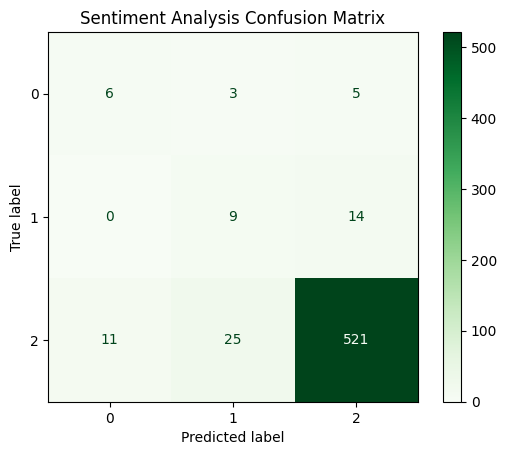

****************************************************************************************************
****************************************************************************************************



,training,test,validation
accurancy,99.04,90.24,98.51
precision_score,NaN,92.25,98.54
recall,NaN,90.24,98.51
f1_score,NaN,91.14,98.50
roc_score,NaN,84.58,99.90


In [95]:
model = LogisticRegression(max_iter=100, random_state=42 )
a = Trainmodel(model , "logisticregression")
a.train_evalution_model(model , "logisticregression")

#  naive-bayes

****************************************************************************************************

----- naive -----

start training job for naive
train job successful for naive
train prediction job for successful for naive
starting testing job for naive
testing job successful for naive
starting validation job for naive
validation job successful for naive

----------------------------------------------------------------------

----- accurancy score -----

training accuracy score of naive : 96.29
testing  accuracy score of naive : 84.34
validation accuracy score of naive : 95.52

----------------------------------------------------------------------

----- precision score -----

testing precision score of naive : 91.73
validation  precision score of naive : 95.77

----------------------------------------------------------------------

----- recall score -----

testing recall score of naive : 84.34
validation  recall score of naive : 95.52

--------------------------------------------

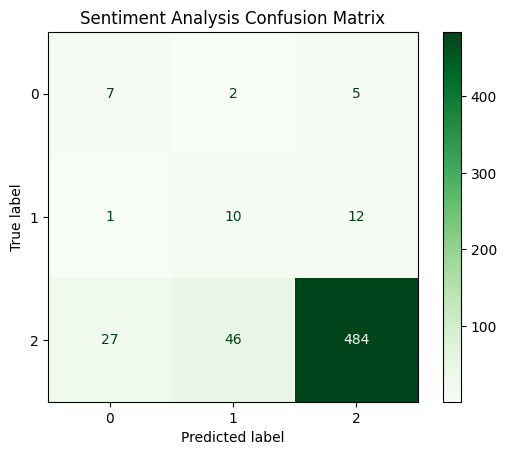

****************************************************************************************************
****************************************************************************************************



,training,test,validation
accurancy,96.29,84.34,95.52
precision_score,NaN,91.73,95.77
recall,NaN,84.34,95.52
f1_score,NaN,87.42,95.44
roc_score,NaN,84.46,99.85


In [96]:
model =  MultinomialNB()
a = Trainmodel(model , "naive")
a.train_evalution_model(model , "naive")

# support vector

****************************************************************************************************

----- support vector -----

start training job for support vector
train job successful for support vector
train prediction job for successful for support vector
starting testing job for support vector
testing job successful for support vector
starting validation job for support vector
validation job successful for support vector

----------------------------------------------------------------------

----- accurancy score -----

training accuracy score of support vector : 99.99
testing  accuracy score of support vector : 94.44
validation accuracy score of support vector : 100.0

----------------------------------------------------------------------

----- precision score -----

testing precision score of support vector : 93.93
validation  precision score of support vector : 100.0

----------------------------------------------------------------------

----- recall score -----

testing 

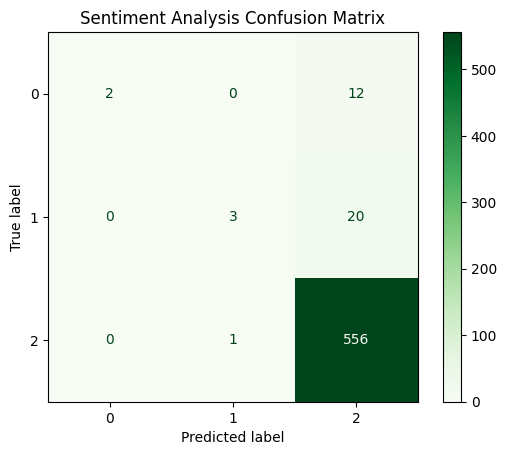

****************************************************************************************************
****************************************************************************************************



,training,test,validation
accurancy,99.99,94.44,100.0
precision_score,NaN,93.93,100.0
recall,NaN,94.44,100.0
f1_score,NaN,92.52,100.0
roc_score,NaN,84.17,100.0


In [97]:
model = SVC(kernel='rbf', random_state=42 , probability=True  , gamma =  "scale")
a = Trainmodel(model , "support vector")
a.train_evalution_model(model , "support vector")

# knn

****************************************************************************************************

----- knn -----

start training job for knn
train job successful for knn
train prediction job for successful for knn
starting testing job for knn
testing job successful for knn
starting validation job for knn
validation job successful for knn

----------------------------------------------------------------------

----- accurancy score -----

training accuracy score of knn : 95.87
testing  accuracy score of knn : 43.1
validation accuracy score of knn : 79.37

----------------------------------------------------------------------

----- precision score -----

testing precision score of knn : 93.4
validation  precision score of knn : 84.59

----------------------------------------------------------------------

----- recall score -----

testing recall score of knn : 43.1
validation  recall score of knn : 79.37

----------------------------------------------------------------------

-----

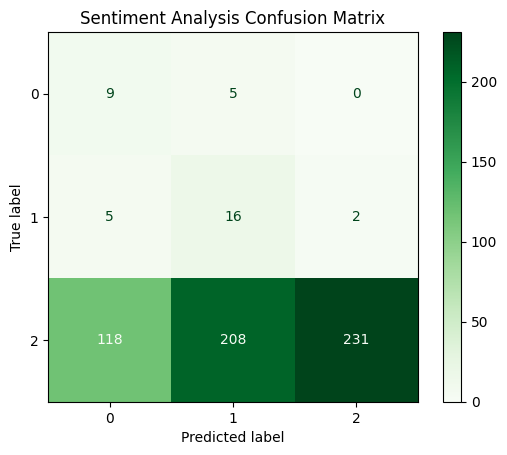

****************************************************************************************************
****************************************************************************************************



,training,test,validation
accurancy,95.87,43.10,79.37
precision_score,NaN,93.40,84.59
recall,NaN,43.10,79.37
f1_score,NaN,55.62,76.26
roc_score,NaN,79.67,99.61


In [98]:
model =  KNeighborsClassifier(n_neighbors=7, weights='distance',  metric='minkowski', p=2 )
a = Trainmodel(model , "knn")
a.train_evalution_model(model , "knn")

# randomforest

****************************************************************************************************

----- randomforest -----

start training job for randomforest
train job successful for randomforest
train prediction job for successful for randomforest
starting testing job for randomforest
testing job successful for randomforest
starting validation job for randomforest
validation job successful for randomforest

----------------------------------------------------------------------

----- accurancy score -----

training accuracy score of randomforest : 87.41
testing  accuracy score of randomforest : 88.38
validation accuracy score of randomforest : 86.62

----------------------------------------------------------------------

----- precision score -----

testing precision score of randomforest : 90.96
validation  precision score of randomforest : 88.49

----------------------------------------------------------------------

----- recall score -----

testing recall score of randomfore

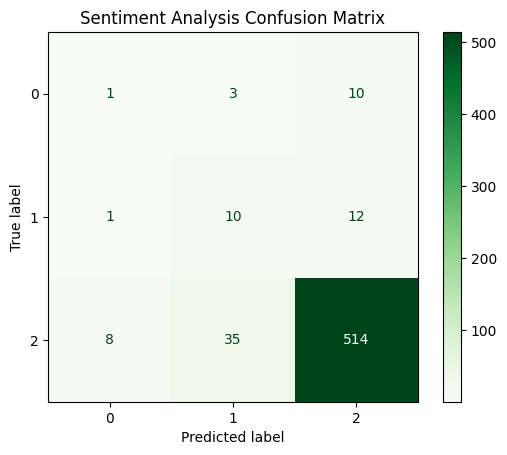

****************************************************************************************************
****************************************************************************************************



,training,test,validation
accurancy,87.41,88.38,86.62
precision_score,NaN,90.96,88.49
recall,NaN,88.38,86.62
f1_score,NaN,89.48,86.84
roc_score,NaN,78.35,97.81


In [99]:
model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5, random_state=4 , n_jobs=1 )
a = Trainmodel(model , "randomforest")
a.train_evalution_model(model , "randomforest")

# gradientboosting

****************************************************************************************************

----- gradientboosting -----

start training job for gradientboosting
train job successful for gradientboosting
train prediction job for successful for gradientboosting
starting testing job for gradientboosting
testing job successful for gradientboosting
starting validation job for gradientboosting
validation job successful for gradientboosting

----------------------------------------------------------------------

----- accurancy score -----

training accuracy score of gradientboosting : 98.61
testing  accuracy score of gradientboosting : 89.9
validation accuracy score of gradientboosting : 97.91

----------------------------------------------------------------------

----- precision score -----

testing precision score of gradientboosting : 91.81
validation  precision score of gradientboosting : 97.94

----------------------------------------------------------------------

----- rec

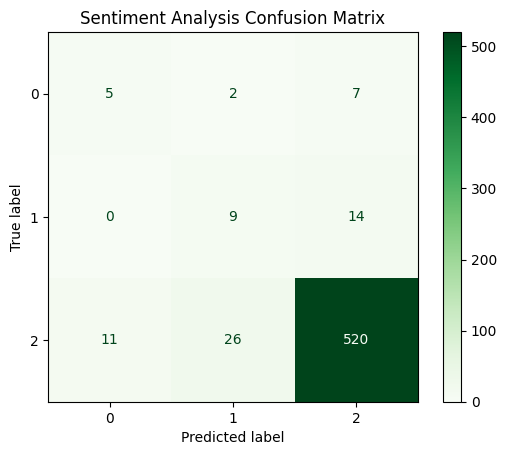

****************************************************************************************************
****************************************************************************************************



,training,test,validation
accurancy,98.61,89.90,97.91
precision_score,NaN,91.81,97.94
recall,NaN,89.90,97.91
f1_score,NaN,90.76,97.91
roc_score,NaN,83.04,99.70


In [100]:
model = GradientBoostingClassifier( n_estimators=100, learning_rate=0.1, max_depth=3 , random_state=42)
a = Trainmodel(model , "gradientboosting")
a.train_evalution_model(model , "gradientboosting")

# decision tree

****************************************************************************************************

----- desicion tree -----

start training job for desicion tree
train job successful for desicion tree
train prediction job for successful for desicion tree
starting testing job for desicion tree
testing job successful for desicion tree
starting validation job for desicion tree
validation job successful for desicion tree

----------------------------------------------------------------------

----- accurancy score -----

training accuracy score of desicion tree : 99.18
testing  accuracy score of desicion tree : 86.03
validation accuracy score of desicion tree : 95.89

----------------------------------------------------------------------

----- precision score -----

testing precision score of desicion tree : 91.66
validation  precision score of desicion tree : 95.96

----------------------------------------------------------------------

----- recall score -----

testing recall score 

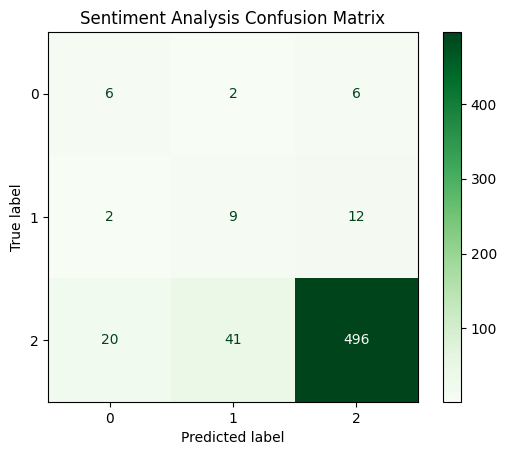

****************************************************************************************************
****************************************************************************************************



,training,test,validation
accurancy,99.18,86.03,95.89
precision_score,NaN,91.66,95.96
recall,NaN,86.03,95.89
f1_score,NaN,88.46,95.85
roc_score,NaN,70.01,96.92


In [101]:
model =  DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)
a = Trainmodel(model , "desicion tree")
a.train_evalution_model(model , "desicion tree")

# catboost

****************************************************************************************************

----- catboost -----

start training job for catboost
0:	learn: 0.5997383	total: 681ms	remaining: 5m 39s
100:	learn: 0.9740138	total: 23.3s	remaining: 1m 32s
200:	learn: 0.9895308	total: 45.4s	remaining: 1m 7s
300:	learn: 0.9947654	total: 1m 7s	remaining: 44.4s
400:	learn: 0.9975696	total: 1m 29s	remaining: 22.2s
499:	learn: 0.9992522	total: 1m 52s	remaining: 0us
train job successful for catboost
train prediction job for successful for catboost
starting testing job for catboost
testing job successful for catboost
starting validation job for catboost
validation job successful for catboost

----------------------------------------------------------------------

----- accurancy score -----

training accuracy score of catboost : 99.64
testing  accuracy score of catboost : 91.75
validation accuracy score of catboost : 98.51

------------------------------------------------------------------

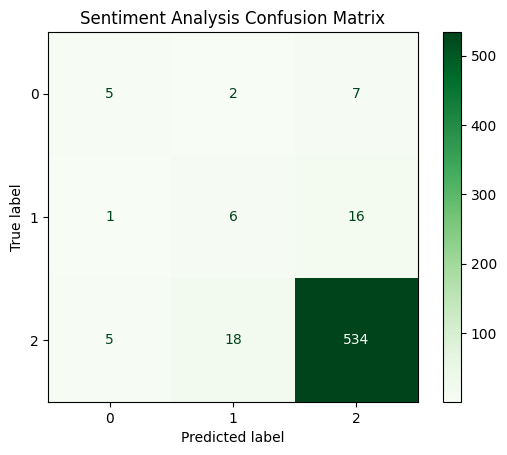

****************************************************************************************************
****************************************************************************************************



,training,test,validation
accurancy,99.64,91.75,98.51
precision_score,NaN,91.86,98.51
recall,NaN,91.75,98.51
f1_score,NaN,91.79,98.50
roc_score,NaN,80.83,99.84


In [102]:
model =  CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, loss_function='MultiClass', eval_metric='Accuracy' , random_seed=42, verbose=100 )
a = Trainmodel(model , "catboost")
a.train_evalution_model(model , "catboost")

# xgb

****************************************************************************************************

----- xgb -----

start training job for xgb
train job successful for xgb
train prediction job for successful for xgb
starting testing job for xgb
testing job successful for xgb
starting validation job for xgb
validation job successful for xgb

----------------------------------------------------------------------

----- accurancy score -----

training accuracy score of xgb : 99.67
testing  accuracy score of xgb : 93.1
validation accuracy score of xgb : 99.1

----------------------------------------------------------------------

----- precision score -----

testing precision score of xgb : 92.65
validation  precision score of xgb : 99.11

----------------------------------------------------------------------

----- recall score -----

testing recall score of xgb : 93.1
validation  recall score of xgb : 99.1

----------------------------------------------------------------------

----- 

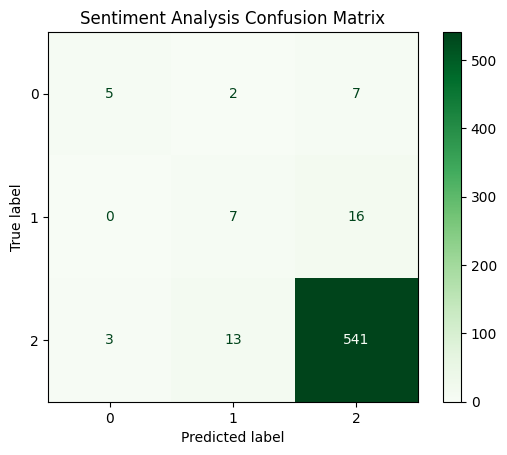

****************************************************************************************************
****************************************************************************************************



,training,test,validation
accurancy,99.67,93.10,99.10
precision_score,NaN,92.65,99.11
recall,NaN,93.10,99.10
f1_score,NaN,92.78,99.10
roc_score,NaN,81.04,99.89


In [103]:
model =  XGBClassifier( objective='multi:softmax', num_class=3, learning_rate=0.1, n_estimators=200, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42 , eval_metric='mlogloss')
a = Trainmodel(model , "xgb")
a.train_evalution_model(model , "xgb")

# lgb

****************************************************************************************************

----- lgb -----

start training job for lgb
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 34207
[LightGBM] [Info] Number of data points in the train set: 5349, number of used features: 680
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

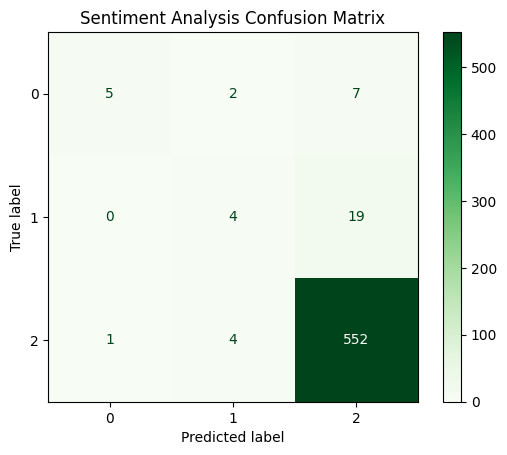

****************************************************************************************************
****************************************************************************************************



,training,test,validation
accurancy,99.82,94.44,99.10
precision_score,NaN,93.07,99.11
recall,NaN,94.44,99.10
f1_score,NaN,93.33,99.10
roc_score,NaN,81.28,99.99


In [104]:
model = lgb.LGBMClassifier(objective='multiclass', num_class=3, learning_rate=0.1, n_estimators=200, max_depth=-1, random_state=42 )
a = Trainmodel(model , "lgb")
a.train_evalution_model(model , "lgb")


# adaboost

****************************************************************************************************

----- adaboost -----

start training job for adaboost
train job successful for adaboost
train prediction job for successful for adaboost
starting testing job for adaboost
testing job successful for adaboost
starting validation job for adaboost
validation job successful for adaboost

----------------------------------------------------------------------

----- accurancy score -----

training accuracy score of adaboost : 99.61
testing  accuracy score of adaboost : 92.26
validation accuracy score of adaboost : 98.06

----------------------------------------------------------------------

----- precision score -----

testing precision score of adaboost : 90.86
validation  precision score of adaboost : 98.06

----------------------------------------------------------------------

----- recall score -----

testing recall score of adaboost : 92.26
validation  recall score of adaboost : 98.06


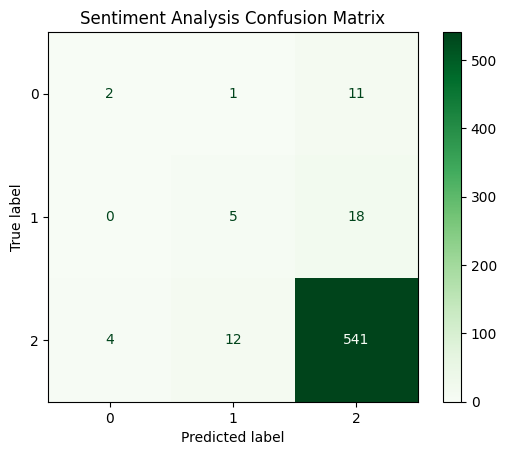

****************************************************************************************************
****************************************************************************************************



,training,test,validation
accurancy,99.61,92.26,98.06
precision_score,NaN,90.86,98.06
recall,NaN,92.26,98.06
f1_score,NaN,91.44,98.06
roc_score,NaN,69.36,99.75


In [105]:
model = AdaBoostClassifier( AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, learning_rate=1.0, algorithm='SAMME', random_state=42) )
a = Trainmodel(model , "adaboost")
a.train_evalution_model(model , "adaboost")

# using optuna library for hyperparameters tuning of models

In [106]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 11.9 MB/s eta 0:00:00


In [107]:
import optuna

# xgb

In [108]:

def objective(trial):

    params = {
       "objective" : "multi:softmax",
       "eval_metric" : "mlogloss",
       "learning_rate" : trial.suggest_float("learning_rate" , 0.010, 0.30, log = True),
       "lambda" : trial.suggest_float("lambda" , 1e-3 , 10 , log = True),
       "alpha" : trial.suggest_float("alpha" , 1e-3 , 10 , log = True),
       "max_depth" : trial.suggest_int("max_depth" , 3 , 10),
       "min_child_weight" : trial.suggest_int("min_child_weight" , 1 , 10),
       "gamma" : trial.suggest_float("gamma" , 0,1),
      }

    model = xgb.XGBClassifier(**params)
    model.fit(x_train_final , y_train_final)

    pred = model.predict(x_test_tfidf)
    accuracy = accuracy_score(y_test , pred)
    return accuracy

In [109]:
study = optuna.create_study(direction = "maximize")
study.optimize(objective , n_trials = 10)

[I 2025-11-12 05:42:15,130] A new study created in memory with name: no-name-83ecc179-e6b1-460d-8b53-fe8b5e178e98
[I 2025-11-12 05:42:36,982] Trial 0 finished with value: 0.8417508417508418 and parameters: {'learning_rate': 0.011607621166829228, 'lambda': 4.093675508428365, 'alpha': 0.10300226387987468, 'max_depth': 7, 'min_child_weight': 5, 'gamma': 0.6848391335095102}. Best is trial 0 with value: 0.8417508417508418.
[I 2025-11-12 05:42:46,743] Trial 1 finished with value: 0.835016835016835 and parameters: {'learning_rate': 0.016607511623714717, 'lambda': 0.005837262852680009, 'alpha': 0.01170497853051153, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 0.5264374924560136}. Best is trial 0 with value: 0.8417508417508418.
[I 2025-11-12 05:42:56,967] Trial 2 finished with value: 0.9006734006734006 and parameters: {'learning_rate': 0.07462988923846757, 'lambda': 0.001328841625663707, 'alpha': 0.015351610449388368, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 0.5678259997763719}. Best 

In [110]:
print("Best Trial:", study.best_trial.number)
print("Best Accuracy:", study.best_value)
print("Best Params:", study.best_params)


Best Trial: 7
Best Accuracy: 0.9292929292929293
Best Params: {'learning_rate': 0.1300753494696017, 'lambda': 0.15074490888771666, 'alpha': 0.0033324992616061712, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.37421475366967805}


****************************************************************************************************

----- xgb -----

start training job for xgb
train job successful for xgb
train prediction job for successful for xgb
starting testing job for xgb
testing job successful for xgb
starting validation job for xgb
validation job successful for xgb

----------------------------------------------------------------------

----- accurancy score -----

training accuracy score of xgb : 99.51
testing  accuracy score of xgb : 92.93
validation accuracy score of xgb : 99.03

----------------------------------------------------------------------

----- precision score -----

testing precision score of xgb : 92.69
validation  precision score of xgb : 99.03

----------------------------------------------------------------------

----- recall score -----

testing recall score of xgb : 92.93
validation  recall score of xgb : 99.03

----------------------------------------------------------------------

--

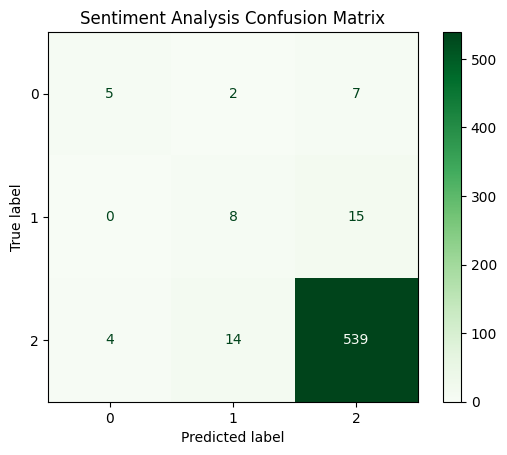

****************************************************************************************************
****************************************************************************************************



,training,test,validation
accurancy,99.51,92.93,99.03
precision_score,NaN,92.69,99.03
recall,NaN,92.93,99.03
f1_score,NaN,92.76,99.03
roc_score,NaN,79.98,99.89


In [111]:
m1 = xgb.XGBClassifier(**study.best_params)
a = Trainmodel(m1 , "xgb")
a.train_evalution_model(m1 , "xgb")

In [112]:
joblib.dump(m1 , "xbg.pkl")
print("model saved")

model saved


# random forest

In [113]:
def objective1(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    # Create model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1 )

    model.fit(x_train_final , y_train_final)

    pred = model.predict(x_test_tfidf)
    accuracy = accuracy_score(y_test , pred)
    return accuracy

In [114]:
study1 = optuna.create_study(direction = "maximize")
study1.optimize(objective1 , n_trials = 10)

[I 2025-11-12 05:44:59,607] A new study created in memory with name: no-name-9b54bf07-0ef6-4704-963e-c6d37d209864
[I 2025-11-12 05:45:26,878] Trial 0 finished with value: 0.9208754208754208 and parameters: {'n_estimators': 856, 'max_depth': 43, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9208754208754208.
[I 2025-11-12 05:46:27,156] Trial 1 finished with value: 0.8653198653198653 and parameters: {'n_estimators': 141, 'max_depth': 23, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 0 with value: 0.9208754208754208.
[I 2025-11-12 05:50:57,108] Trial 2 finished with value: 0.8215488215488216 and parameters: {'n_estimators': 795, 'max_depth': 11, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 0 with value: 0.9208754208754208.
[I 2025-11-12 05:55:50,615] Trial 3 finished with value: 0.8636363636363636 and parameters: {'n_estimators': 660, 'max_depth': 37, 'min

In [115]:
print("Best Trial:", study1.best_trial.number)
print("Best Accuracy:", study1.best_value)
print("Best Params:", study1.best_params)


Best Trial: 6
Best Accuracy: 0.9292929292929293
Best Params: {'n_estimators': 971, 'max_depth': 47, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}


****************************************************************************************************

----- randomforest -----

start training job for randomforest
train job successful for randomforest
train prediction job for successful for randomforest
starting testing job for randomforest
testing job successful for randomforest
starting validation job for randomforest
validation job successful for randomforest

----------------------------------------------------------------------

----- accurancy score -----

training accuracy score of randomforest : 97.91
testing  accuracy score of randomforest : 92.93
validation accuracy score of randomforest : 97.83

----------------------------------------------------------------------

----- precision score -----

testing precision score of randomforest : 91.51
validation  precision score of randomforest : 97.89

----------------------------------------------------------------------

----- recall score -----

testing recall score of randomfore

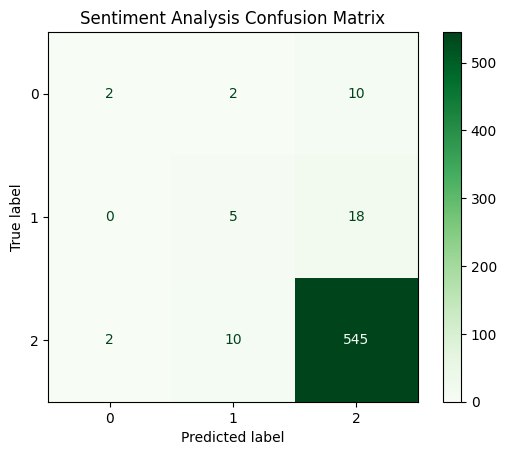

****************************************************************************************************
****************************************************************************************************



,training,test,validation
accurancy,97.91,92.93,97.83
precision_score,NaN,91.51,97.89
recall,NaN,92.93,97.83
f1_score,NaN,91.94,97.84
roc_score,NaN,79.27,99.84


In [116]:
m2 = RandomForestClassifier(**study1.best_params)
a = Trainmodel(m2 , "randomforest")
a.train_evalution_model(m2 , "randomforest")

In [117]:
joblib.dump(m2 , "randomforest.pkl")
print("model saved")

model saved


# lgb

In [118]:
def objective2(trial):
    params = {
        'objective': 'multiclass',
        'num_class': len(np.unique(y_train)),
        'metric': 'multi_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 100),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True)
    }

    model = lgb.LGBMClassifier(**params)
    model.fit(x_train_final , y_train_final)

    pred = model.predict(x_test_tfidf)
    accuracy = accuracy_score(y_test , pred)
    return accuracy

In [119]:
study2 = optuna.create_study(direction = "maximize")
study2.optimize(objective2 , n_trials = 10)

[I 2025-11-12 06:02:55,580] A new study created in memory with name: no-name-91704e9a-c338-43a1-bec5-31cafa729827
[I 2025-11-12 06:02:57,507] Trial 0 finished with value: 0.9276094276094277 and parameters: {'learning_rate': 0.16699237922382776, 'num_leaves': 136, 'max_depth': 30, 'min_data_in_leaf': 80, 'feature_fraction': 0.6569178637342334, 'bagging_fraction': 0.8667581514944882, 'bagging_freq': 7, 'lambda_l1': 0.12692363363927844, 'lambda_l2': 2.037540856338117e-08}. Best is trial 0 with value: 0.9276094276094277.
[I 2025-11-12 06:03:01,271] Trial 1 finished with value: 0.8922558922558923 and parameters: {'learning_rate': 0.016901295780869203, 'num_leaves': 192, 'max_depth': 26, 'min_data_in_leaf': 44, 'feature_fraction': 0.9256955235610648, 'bagging_fraction': 0.9105050312050245, 'bagging_freq': 1, 'lambda_l1': 0.2599950161352428, 'lambda_l2': 0.032464663525652526}. Best is trial 0 with value: 0.9276094276094277.
[I 2025-11-12 06:03:03,432] Trial 2 finished with value: 0.8501683501

In [120]:
print("Best Trial:", study2.best_trial.number)
print("Best Accuracy:", study2.best_value)
print("Best Params:", study2.best_params)


Best Trial: 9
Best Accuracy: 0.9377104377104377
Best Params: {'learning_rate': 0.07949975260530595, 'num_leaves': 21, 'max_depth': 20, 'min_data_in_leaf': 49, 'feature_fraction': 0.9665174384115637, 'bagging_fraction': 0.7740882367768663, 'bagging_freq': 5, 'lambda_l1': 4.59528964969485e-06, 'lambda_l2': 2.4205715986863486e-08}


****************************************************************************************************

----- lgb -----

start training job for lgb
train job successful for lgb
train prediction job for successful for lgb
starting testing job for lgb
testing job successful for lgb
starting validation job for lgb
validation job successful for lgb

----------------------------------------------------------------------

----- accurancy score -----

training accuracy score of lgb : 99.66
testing  accuracy score of lgb : 93.77
validation accuracy score of lgb : 98.73

----------------------------------------------------------------------

----- precision score -----

testing precision score of lgb : 93.49
validation  precision score of lgb : 98.73

----------------------------------------------------------------------

----- recall score -----

testing recall score of lgb : 93.77
validation  recall score of lgb : 98.73

----------------------------------------------------------------------

--

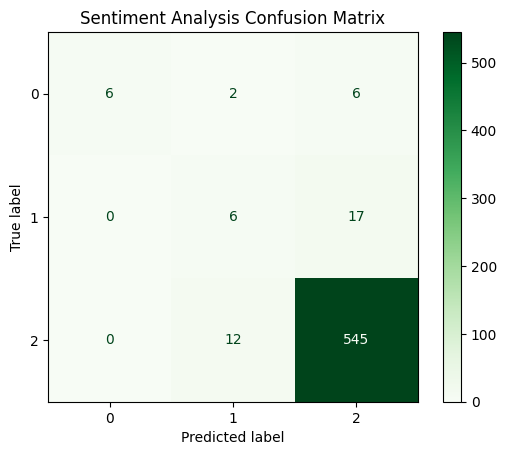

****************************************************************************************************
****************************************************************************************************



,training,test,validation
accurancy,99.66,93.77,98.73
precision_score,NaN,93.49,98.73
recall,NaN,93.77,98.73
f1_score,NaN,93.35,98.73
roc_score,NaN,79.52,99.97


In [121]:
m3 =  lgb.LGBMClassifier(**study2.best_params)
a = Trainmodel(m3 , "lgb")
a.train_evalution_model(m3 , "lgb")

In [122]:
joblib.dump(m3 , "lgb.pkl")
print("model saved")

model saved


# support vector

In [123]:
def objective3(trial):
    # Suggest parameters
    kernel = trial.suggest_categorical("kernel", ["linear", "rbf", "poly", "sigmoid"])
    C = trial.suggest_float("C", 0.1, 10.0, log=True)

    if kernel in ["rbf", "poly", "sigmoid"]:
        gamma = trial.suggest_categorical("gamma", ["scale", "auto"])
    else:
        gamma = "scale"

    degree = 3
    if kernel == "poly":
        degree = trial.suggest_int("degree", 2, 5)

    # Define model
    model = SVC(
        kernel=kernel,
        C=C,
        gamma=gamma,
        degree=degree,
        decision_function_shape='ovr',  # one-vs-rest for multiclass
        random_state=42,
        probability=True,
        class_weight='balanced'
    )


    model.fit(x_train_final , y_train_final)

    pred = model.predict(x_test_tfidf)
    accuracy = accuracy_score(y_test , pred)
    return accuracy


In [124]:
study3 = optuna.create_study(direction = "maximize")
study3.optimize(objective3 , n_trials = 5)

[I 2025-11-12 06:03:20,945] A new study created in memory with name: no-name-e9539620-3530-4837-a70b-90ec7d0c20d5
[I 2025-11-12 06:03:53,276] Trial 0 finished with value: 0.9259259259259259 and parameters: {'kernel': 'linear', 'C': 3.1333456881132147}. Best is trial 0 with value: 0.9259259259259259.
[I 2025-11-12 06:08:00,492] Trial 1 finished with value: 0.6212121212121212 and parameters: {'kernel': 'sigmoid', 'C': 3.8804610793802934, 'gamma': 'auto'}. Best is trial 0 with value: 0.9259259259259259.
[I 2025-11-12 06:09:16,536] Trial 2 finished with value: 0.9444444444444444 and parameters: {'kernel': 'rbf', 'C': 0.5531711064491109, 'gamma': 'scale'}. Best is trial 2 with value: 0.9444444444444444.
[I 2025-11-12 06:13:47,148] Trial 3 finished with value: 0.6212121212121212 and parameters: {'kernel': 'rbf', 'C': 2.4179539039016125, 'gamma': 'auto'}. Best is trial 2 with value: 0.9444444444444444.
[I 2025-11-12 06:14:58,913] Trial 4 finished with value: 0.9023569023569024 and parameters:

In [125]:
print("Best Trial:", study3.best_trial.number)
print("Best Accuracy:", study3.best_value)
print("Best Params:", study3.best_params)


Best Trial: 2
Best Accuracy: 0.9444444444444444
Best Params: {'kernel': 'rbf', 'C': 0.5531711064491109, 'gamma': 'scale'}


****************************************************************************************************

----- support vector -----

start training job for support vector
train job successful for support vector
train prediction job for successful for support vector
starting testing job for support vector
testing job successful for support vector
starting validation job for support vector
validation job successful for support vector

----------------------------------------------------------------------

----- accurancy score -----

training accuracy score of support vector : 99.99
testing  accuracy score of support vector : 94.44
validation accuracy score of support vector : 100.0

----------------------------------------------------------------------

----- precision score -----

testing precision score of support vector : 93.93
validation  precision score of support vector : 100.0

----------------------------------------------------------------------

----- recall score -----

testing 

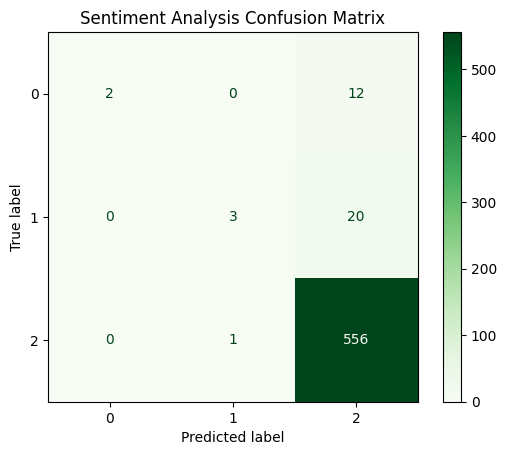

****************************************************************************************************
****************************************************************************************************



,training,test,validation
accurancy,99.99,94.44,100.0
precision_score,NaN,93.93,100.0
recall,NaN,94.44,100.0
f1_score,NaN,92.52,100.0
roc_score,NaN,83.81,100.0


In [126]:
m4 = SVC(**study3.best_params ,  probability=True)
a = Trainmodel(m4 , "support vector")
a.train_evalution_model(m4 , "support vector")

In [127]:
joblib.dump(m4 , "svm.pkl")
print("model saved")

model saved


# adaboost

In [128]:
def objective4(trial):
    # Tune base estimator (DecisionTree)
    base_estimator = DecisionTreeClassifier(
        max_depth= 3)


    # Tune AdaBoost parameters
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 1.0, log=True)

    model = AdaBoostClassifier(
        estimator=base_estimator,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=42
    )

    model.fit(x_train_final , y_train_final)

    pred = model.predict(x_test_tfidf)
    accuracy = accuracy_score(y_test , pred)
    return accuracy


In [129]:
study4 = optuna.create_study(direction = "maximize")
study4.optimize(objective4 , n_trials = 5)

[I 2025-11-12 06:16:53,412] A new study created in memory with name: no-name-b0a2d4a8-9333-452f-a871-6bd59bc5052f
[I 2025-11-12 06:17:45,685] Trial 0 finished with value: 0.9006734006734006 and parameters: {'n_estimators': 124, 'learning_rate': 0.7461962172000427}. Best is trial 0 with value: 0.9006734006734006.
[I 2025-11-12 06:18:43,132] Trial 1 finished with value: 0.9006734006734006 and parameters: {'n_estimators': 139, 'learning_rate': 0.5573753916235142}. Best is trial 0 with value: 0.9006734006734006.
[I 2025-11-12 06:20:17,279] Trial 2 finished with value: 0.8282828282828283 and parameters: {'n_estimators': 226, 'learning_rate': 0.07525089866541002}. Best is trial 0 with value: 0.9006734006734006.
[I 2025-11-12 06:21:49,215] Trial 3 finished with value: 0.9057239057239057 and parameters: {'n_estimators': 224, 'learning_rate': 0.5017445248935798}. Best is trial 3 with value: 0.9057239057239057.
[I 2025-11-12 06:22:21,800] Trial 4 finished with value: 0.8114478114478114 and param

In [130]:
print("Best Trial:", study4.best_trial.number)
print("Best Accuracy:", study4.best_value)
print("Best Params:", study4.best_params)


Best Trial: 3
Best Accuracy: 0.9057239057239057
Best Params: {'n_estimators': 224, 'learning_rate': 0.5017445248935798}


****************************************************************************************************

----- adaboost -----

start training job for adaboost
train job successful for adaboost
train prediction job for successful for adaboost
starting testing job for adaboost
testing job successful for adaboost
starting validation job for adaboost
validation job successful for adaboost

----------------------------------------------------------------------

----- accurancy score -----

training accuracy score of adaboost : 83.6
testing  accuracy score of adaboost : 80.98
validation accuracy score of adaboost : 81.99

----------------------------------------------------------------------

----- precision score -----

testing precision score of adaboost : 91.04
validation  precision score of adaboost : 83.36

----------------------------------------------------------------------

----- recall score -----

testing recall score of adaboost : 80.98
validation  recall score of adaboost : 81.99



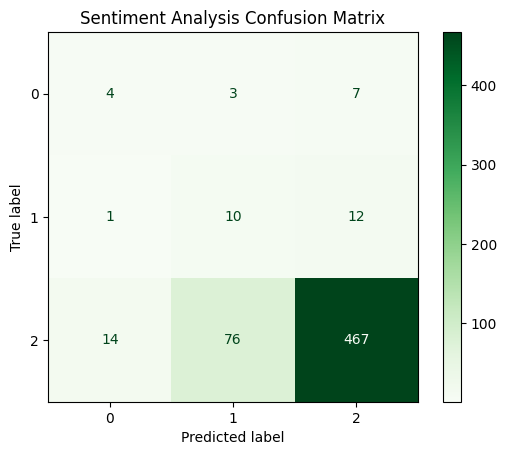

****************************************************************************************************
****************************************************************************************************



,training,test,validation
accurancy,83.6,80.98,81.99
precision_score,NaN,91.04,83.36
recall,NaN,80.98,81.99
f1_score,NaN,85.23,82.23
roc_score,NaN,77.58,94.45


In [131]:
m5 = AdaBoostClassifier(**study4.best_params)
a = Trainmodel(m5 , "adaboost")
a.train_evalution_model(m5 , "adaboost")

In [132]:
joblib.dump(m5 , "adaboost.pkl")
print("model saved")

model saved


In [133]:
vectorize = TfidfVectorizer(max_features=2000)

In [134]:
joblib.dump(vectorize , "vectorize.pkl")
print("model saved")

model saved


# prediction new data :-

## load model XGBclassifier

In [161]:
model = joblib.load("xbg.pkl")


In [162]:
model

XGBClassifier(alpha=0.0033324992616061712, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.37421475366967805, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              lambda=0.15074490888771666, learning_rate=0.1300753494696017,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, ...)

In [163]:
vectorize = joblib.load("vectorize.pkl")

In [164]:
vectorize

TfidfVectorizer(max_features=2000)

In [165]:
final_dataframe3.head()

,product_name,Product Brand,categories,primaryCategories,text,title,year,month,day,char_len,word_count,new_text,lemma
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,Amazon kindle fire has a lot of free app and c...,very handy device,2016,May,23,101,22,amazon kindle fire has a lot of free app and c...,amazon kindle fire lot free app want online
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",The Echo Show is a great addition to the Amazo...,Another winner from Amazon,2018,January,2,312,54,the echo show is a great addition to the amazo...,echo great addition amazon family work like ec...
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far,2017,January,2,52,9,great value from best buy bought at christmas ...,great value good buy buy christmas sale
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,"I use mine for email, Facebook ,games and to g...",Love it!!!,2017,March,25,178,38,i use mine for email facebook games and to go ...,use email facebook game line load book use pho...
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",This is a fantastic item & the person I bought...,Fantastic!,2017,November,15,63,14,this is a fantastic item the person i bought i...,fantastic item person buy love


In [169]:
pre_text = final_dataframe3['text'].tolist()
pre_text

['Amazon kindle fire has a lot of free app and can be used by any one that wants to get online anywhere',
 'The Echo Show is a great addition to the Amazon family. Works just like the Echo, but with a 7" screen. Bright vibrant display. Rich clear sound. Works great with Arlo security cameras. Excellent smart home addition. Just hope Google and Amazon start playing nice with each other soon so youtube will work again.',
 'Great value from Best Buy. Bought at Christmas sale.',
 'I use mine for email, Facebook ,games and to go on line. I also have down loaded books. I use it to take photos. It is small and be taken easily. I would recommend it to anyone .',
 'This is a fantastic item & the person I bought it for loves it.',
 'This is a great devise for reading books or taking photos. Best Buy Associate was very helpful.',
 'I have enjoyed learning about home automation using Echo plus and consumers need to know that this comes with having to buy additional equipment to get the most out of

In [172]:
new_tfidf = vectorize.fit_transform(pre_text).toarray()


In [173]:
prediction = model.predict(new_tfidf)
prediction

array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2,

In [175]:
probability = model.predict_proba(new_tfidf)
probability

array([[0.26922172, 0.13015307, 0.60062516],
       [0.11757535, 0.11960541, 0.76281923],
       [0.05101428, 0.05792276, 0.89106303],
       ...,
       [0.04733968, 0.05417995, 0.89848036],
       [0.09127381, 0.06423113, 0.8444951 ],
       [0.11906549, 0.06187684, 0.8190577 ]], dtype=float32)

In [177]:
for text, pred , prob in zip(pre_text , prediction , probability):
  confidance = max(prob)
  print(f'text : {text} \n')
  print(f'prediction : {pred} \n')
  print(f'confidance : {confidance} \n')
  print(f'{"-" * 100}\n')


text : Amazon kindle fire has a lot of free app and can be used by any one that wants to get online anywhere 

prediction : 2 

confidance : 0.6006251573562622 

----------------------------------------------------------------------------------------------------

text : The Echo Show is a great addition to the Amazon family. Works just like the Echo, but with a 7" screen. Bright vibrant display. Rich clear sound. Works great with Arlo security cameras. Excellent smart home addition. Just hope Google and Amazon start playing nice with each other soon so youtube will work again. 

prediction : 2 

confidance : 0.762819230556488 

----------------------------------------------------------------------------------------------------

text : Great value from Best Buy. Bought at Christmas sale. 

prediction : 2 

confidance : 0.8910630345344543 

----------------------------------------------------------------------------------------------------

text : I use mine for email, Facebook ,games an

## support vector

In [180]:
model_support   = joblib.load("svm.pkl")
model_support

SVC(C=0.5531711064491109, probability=True)

In [181]:
prediction = model_support.predict(new_tfidf)
prediction

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

## random forest

In [182]:
model_forest = joblib.load("randomforest.pkl")
model_forest

RandomForestClassifier(max_depth=47, max_features='log2', min_samples_leaf=2,
                       n_estimators=971)

In [183]:
prediction = model_forest.predict(new_tfidf)
prediction

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,

In [185]:
probability = model_forest.predict_proba(new_tfidf)
probability

array([[0.21953705, 0.24325424, 0.53720871],
       [0.19835667, 0.34840164, 0.45324168],
       [0.19653629, 0.25766775, 0.54579596],
       ...,
       [0.28935372, 0.22015006, 0.49049622],
       [0.21179501, 0.2192064 , 0.56899859],
       [0.22640201, 0.17095362, 0.60264437]])

## lgbclassifier

In [186]:
model_lgb = joblib.load("lgb.pkl")
model_lgb

LGBMClassifier(bagging_fraction=0.7740882367768663, bagging_freq=5,
               feature_fraction=0.9665174384115637,
               lambda_l1=4.59528964969485e-06, lambda_l2=2.4205715986863486e-08,
               learning_rate=0.07949975260530595, max_depth=20,
               min_data_in_leaf=49, num_leaves=21)

In [187]:
prediction = model_lgb.predict(new_tfidf)
prediction

array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,

In [188]:
probability = model_lgb.predict_proba(new_tfidf)
probability

array([[0.104929  , 0.0411232 , 0.85394781],
       [0.01207666, 0.14033664, 0.8475867 ],
       [0.00326084, 0.02150753, 0.97523163],
       ...,
       [0.03099903, 0.0413217 , 0.92767927],
       [0.01410192, 0.02004645, 0.96585163],
       [0.03069951, 0.01105144, 0.95824905]])

# conclution :-  
   we have applied different types of classification algorithms in multiclass sentiment analysis and also use optuna library for hyparparameters tuning.
   so i am conclude that after applying optuna libtary in xgb , lgb , support vector , adaboost , random forest for hyperparameters tuning. bettarly work is xbg classifier because of  all parameters is very well and perform is best.
   XGB classifier details show below in table so bettarly understand  :  

   |index|training|test|validation|
|---|---|---|---|
|accurancy|99\.51|92\.93|99\.03|
|precision\_score|NaN|92\.69|99\.03|
|recall|NaN|92\.93|99\.03|
|f1\_score|NaN|92\.76|99\.03|
|roc\_score|NaN|79\.98|99\.89|